#PART 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

there's structred and unstructured data!


In [2]:
from sklearn.datasets import fetch_openml
# try fetching the dataset using its data ID instead of
mnist = fetch_openml(data_id=554, as_frame=False)

In [3]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
X = mnist['data']
y = mnist['target']

In [5]:
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47

In [6]:
mnist['target']

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
X[0].shape

(784,)

In [8]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [9]:
X.shape

(70000, 784)

datani vizuallasdirmaq

In [10]:
print(X[0].reshape(28, 28))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

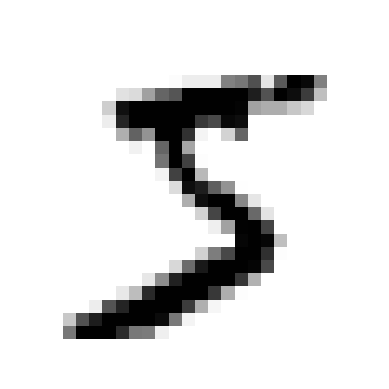

In [11]:
def digit_image(num_image):
  num_image_reshaped = num_image.reshape(28, 28)
  plt.imshow(num_image_reshaped, cmap = 'binary')
  plt.axis('off')
some_digit = X[0]
digit_image(some_digit)

In [12]:
y[0]

'5'

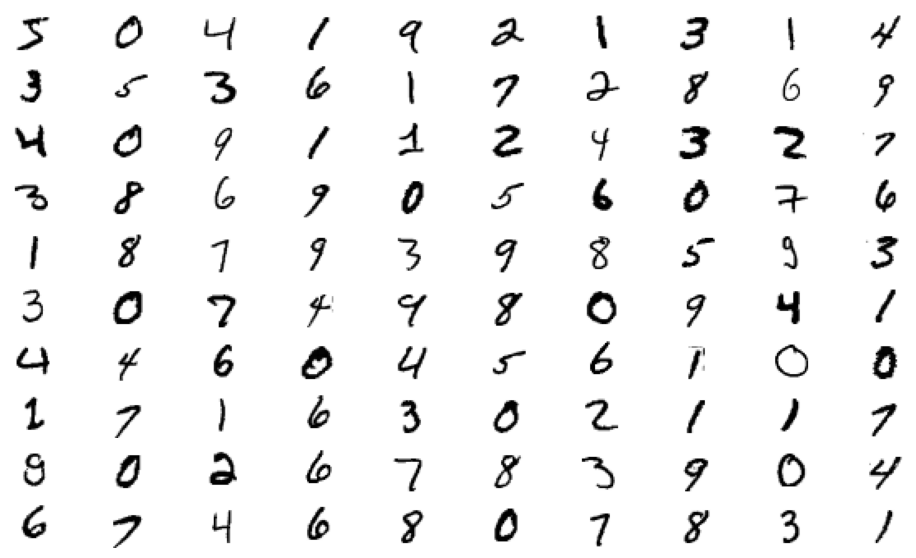

In [13]:
plt.figure(figsize= (12,7))
for idx, image in enumerate(X[:100]):
  plt.subplot(10,10, idx + 1)
  digit_image(image)

In [14]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [15]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [16]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

In [17]:
sgd_clf = SGDClassifier(random_state=42)

In [18]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [19]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3)

array([0.95035, 0.96035, 0.9604 ])

In [20]:
t = [0.95035, 0.96035, 0.9604]
np.mean(t)

np.float64(0.9570333333333334)

In [21]:
sgd_clf.score(X_test, y_test_5)

0.9492

In [22]:
sgd_clf.predict([some_digit])

array([ True])

In [23]:
(sum(y_train == '5') / len(y_train))

np.float64(0.09035)

In [24]:
1 - (sum(y_train == '5') / len(y_train))

np.float64(0.90965)

In [25]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [26]:
dummy_clf.score(X_train, y_train_5)

0.90965

In [27]:
len(y_train) - sum(y_train_5)

np.int64(54579)

In [28]:
54570 / 60000

0.9095

In [29]:
len(y_train), sum(y_train_5)

(60000, np.int64(5421))

In [30]:
pd.DataFrame(y_train_5).value_counts()

,count
0,
False,54579
True,5421


recall score and precision score is more important than accurancy

In [31]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3)

array([0.90965, 0.90965, 0.90965])

f1_score --> recall ve precision ortalamasidir. --> tibbde recall and f1 score is important

In [32]:
from sklearn.model_selection import cross_val_predict
preds = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
preds

array([ True, False, False, ...,  True, False, False])

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, preds)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [35]:
precision_score(y_train_5, preds) * 100

83.70879772350011

In [36]:
recall_score(y_train_5, preds) * 100

65.11713705958311

In [37]:
f1_score(y_train_5, preds) * 100

73.25171197343847

trade off

#PART 2

tradeoff, treshholds and etc
baxmaqq isteyirik ki model oz texmininden ne qeder emindi o zamman decision_function

In [38]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [39]:
treshold = 0
y_some_digit_pred = (y_scores > treshold)
y_some_digit_pred

array([ True])

cross val predict butun data uzerinde texmin edir

In [40]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method = 'decision_function')
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [41]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [42]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, tresholds = precision_recall_curve(y_train_5, y_scores)

In [43]:
tresholds

array([-146348.56726174, -142300.00705404, -137588.97581744, ...,
         38871.26391927,   42216.05562787,   49441.43765905])

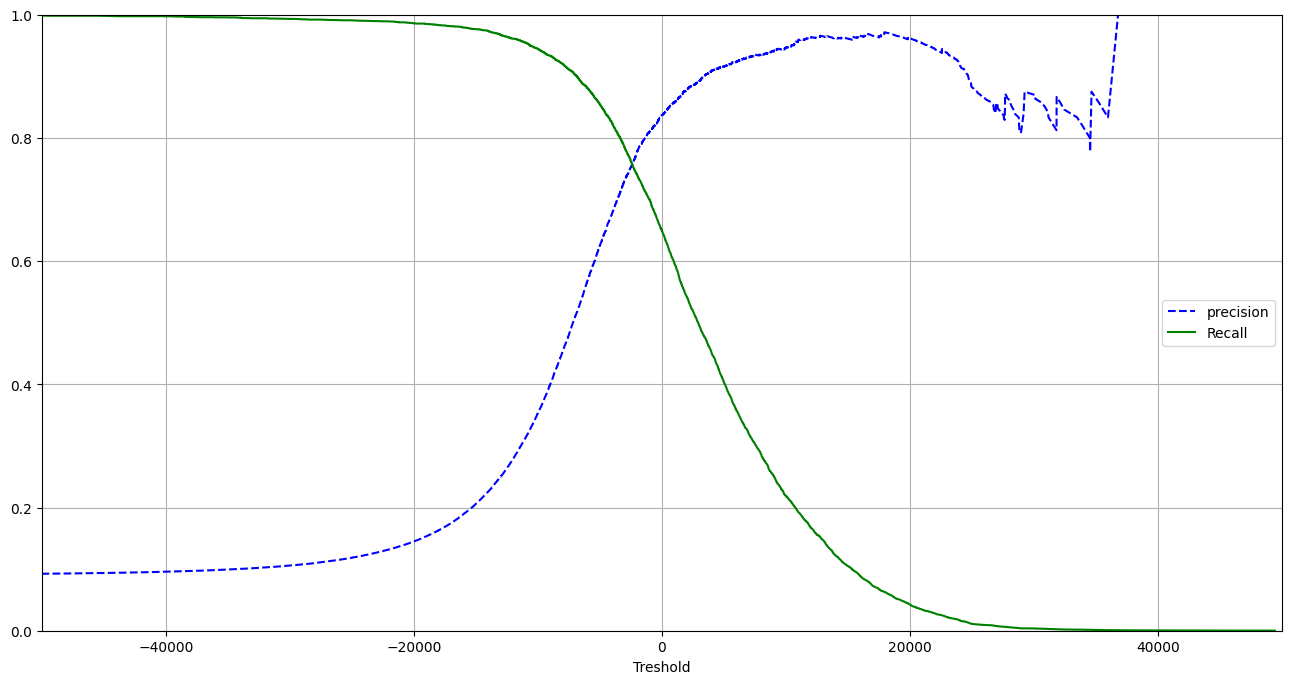

In [44]:
plt.figure(figsize=(16, 8))
plt.plot(tresholds, precisions[:-1], 'b--', label = 'precision')
plt.plot(tresholds, recalls[:-1], 'g-', label = 'Recall')
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel('Treshold')
plt.legend(loc = 'center right');

In [45]:
idx_for_90_precision = (precisions > 0.90).argmax()
threshold_for_90_precision = tresholds[idx_for_90_precision]
idx_for_90_precision

np.int64(57109)

In [46]:
idx_for_equal_precision = (precisions == recalls).argmax()
tresholds_for_equals = tresholds[idx_for_equal_precision]
tresholds_for_equals

np.float64(-2379.064500932274)

In [47]:
precisions[idx_for_equal_precision], recalls[idx_for_equal_precision]

(np.float64(0.7572403615569083), np.float64(0.7572403615569083))

In [48]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [49]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [50]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

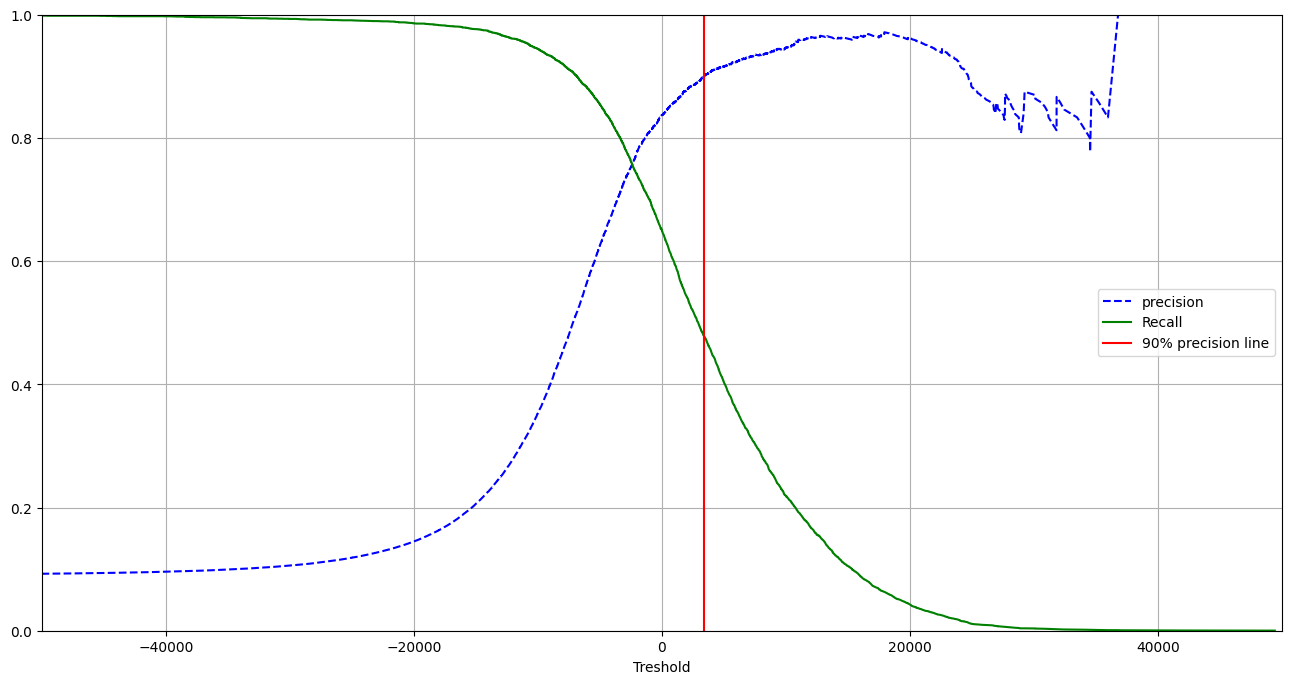

In [51]:
plt.figure(figsize=(16, 8))
plt.plot(tresholds, precisions[:-1], 'b--', label = 'precision')
plt.plot(tresholds, recalls[:-1], 'g-', label = 'Recall')
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel('Treshold')
plt.axvline(x = threshold_for_90_precision, ymin=0, ymax=1, color = 'r', label = '90% precision line')
plt.legend(loc = 'center right');

In [52]:
from sklearn.metrics import roc_curve
fpr, tpr, tresholds = roc_curve(y_train_5, y_scores)

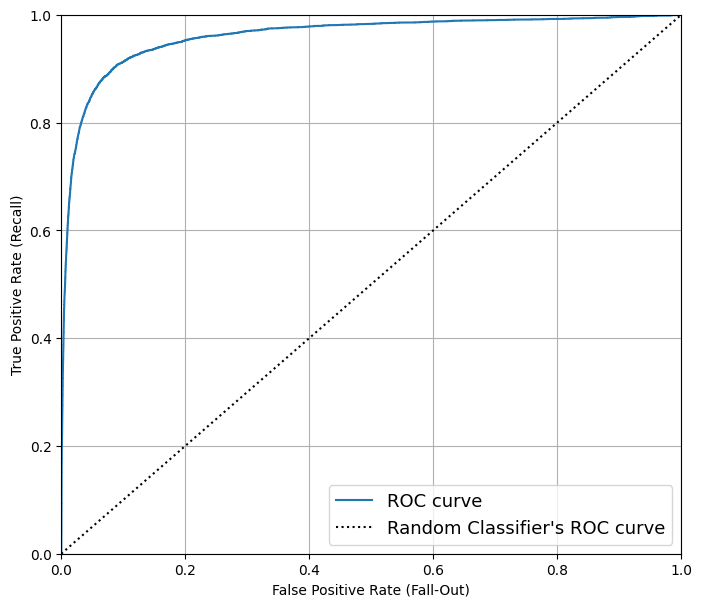

In [53]:
plt.figure(figsize=(8, 7))
plt.plot(fpr, tpr, label = 'ROC curve')
plt.plot([0,1],[0,1], 'k:', label = "Random Classifier's ROC curve")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc='lower right', fontsize=13);

In [54]:
pd.value_counts(y)

<ipython-input-54-0e04e23f3b37>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(y)


,count
1,7877
7,7293
3,7141
2,6990
9,6958
0,6903
6,6876
8,6825
4,6824
5,6313


In [55]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

np.float64(0.9604938554008616)

In [56]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [57]:
y_probas_forest = cross_val_predict(forest_clf,
                                    X_train,
                                    y_train_5,
                                    cv=3,
                                    method = 'predict_proba')

In [58]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [59]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, tresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest)

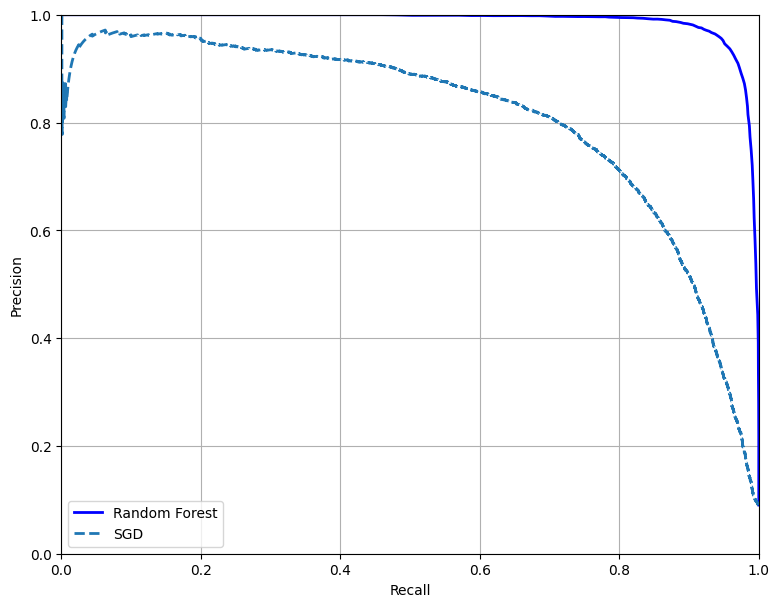

In [60]:
plt.figure(figsize=(9, 7))

plt.plot(recalls_forest, precisions_forest, 'b-', linewidth=2,
         label='Random Forest')
plt.plot(recalls, precisions, '--', linewidth=2, label='SGD')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc='lower left')

In [61]:
y_train_pred_forest = y_probas_forest[:,1] >= 0.5
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [62]:
roc_auc_score(y_train_5, y_scores_forest)

np.float64(0.9983436731328145)

In [63]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

#MultiClass Classificatin

In [64]:
from sklearn.svm import SVC

svm_clf = SVC(random_state= 42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [65]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [66]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [67]:
class_id = some_digit_scores.argmax()
class_id

np.int64(5)

In [68]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [69]:
svm_clf.classes_[class_id]

'5'

In [70]:
svm_clf.desicion_function_shape = ' ovo'
some_digit_scores_ovo = svm_clf.decision_function([some_digit])
some_digit_scores_ovo.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [71]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state = 42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [72]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [73]:
len(ovr_clf.estimators_)

10

In [74]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [75]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [76]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype('float64'))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring = 'accuracy')

array([0.8983, 0.891 , 0.9018])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_prediction(y_train, y_train_pred)
plt.show()

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_prediction'

In [ ]:
X_train

In [ ]:
plt.rc('font', size = 10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize='true', values_format='.0%')
plt.show()

how to find biggest errors models made

#Multilabel Classification

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train.astype('int8') >= 7)
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_(y_train_large, y_train_odd)

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabels)

In [ ]:
knn_clf.predict(X_train[:3])

In [ ]:
y_train

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

#MultiOutput Classification

In [ ]:
import random
np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
X[0]

In [ ]:
plt.subplot(121);
digit_image(X_test_mod[0])
plt.subplot(122);
digit_image(y_test_mod[0])
plt.show()

In [ ]:
knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train_mod, y-train_mod)
cleaned_pic = knn_clf.predict([X_test_mod[0]])

digit_image(cleaned_pic)

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
baseline_accuracy = knn_clf.score(X_test, y_test)
baseline_accuracy